In [6]:
from numpy_simulator import Sim
import numpy as np                        
from sklearn.decomposition import PCA     
from sklearn.manifold import TSNE         
from umap import UMAP
import matplotlib.pyplot as plt           
from SERGIO.SERGIO.sergio import sergio   
from time import time

In [13]:
start = time()
interactions_filename = 'SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Interaction_cID_6.txt'
regulators_filename = 'SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Regs_cID_6.txt'
# interactions_filename = 'SERGIO/data_sets/De-noised_100G_9T_300cPerT_4_DS1/Interaction_cID_4.txt'
# regulators_filename = 'SERGIO/data_sets/De-noised_100G_9T_300cPerT_4_DS1/Regs_cID_4.txt'
sim = Sim(num_genes=1200, num_cells_types=9, num_cells_to_simulate=6, interactions=interactions_filename, regulators=regulators_filename)
sim.run()
expr_clean = sim.x
print(expr_clean.shape)
print(f"took {time() - start:.4f} seconds")

sampling time steps:  300
(300, 1200, 9)
took 13.1119 seconds


In [14]:
pca = PCA(n_components = 10)  
tsne = TSNE(n_components = 2)     
umap_algo = UMAP(n_components = 2)

In [15]:
expr_clean.shape

(300, 1200, 9)

In [16]:
expr_clean_T = np.concatenate(expr_clean.T, axis = 1).T

/tmp/ipykernel_13473/503846770.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  anno = [np.array([str(x)] * 300, dtype=np.object) for x in range(9)]


2700
(2700, 1200)


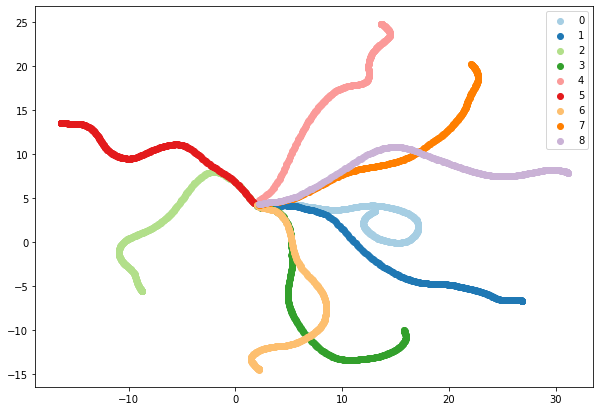

In [18]:
anno = [np.array([str(x)] * 300, dtype=np.object) for x in range(9)]
anno = np.concatenate(anno, axis = 0)
print(len(anno))
counts_true = expr_clean_T

print(counts_true.shape)

# counts_obs = counts_obs/(np.sum(counts_obs, axis = 1)[:, None] + 1e-6)* 100


# counts_true = np.log1p(counts_true)

x_pca = pca.fit_transform(counts_true)
# x_tsne = tsne.fit_transform(x_pca)
x_umap = umap_algo.fit_transform(x_pca)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot()
colormap = plt.get_cmap("Paired")
for i, clust in enumerate(np.sort(np.unique(anno))):
    idx = np.where(anno == clust)[0]
    ax.scatter(x_umap[idx, 0], x_umap[idx, 1], color = colormap(i), label = clust)
ax.legend()
plt.show()